# <font color=#cc0012>Prosper</font>

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $14 billion in loans to more than 870,000 people.

Borrowers apply online for a fixed-rate, fixed-term loan between \$2000 and \$40000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("prosper-loan-data.csv")

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
keys = ["ListingKey","ListingCreationDate","LoanOriginationDate","DateCreditPulled","ProsperRating (Alpha)","Term","ListingCategory (numeric)","LoanOriginalAmount","BorrowerRate","EstimatedReturn","LoanStatus","StatedMonthlyIncome","IsBorrowerHomeowner","ProsperPrincipalBorrowed","ProsperPrincipalOutstanding"]

In [5]:
df[keys].head()

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating (Alpha),Term,ListingCategory (numeric),LoanOriginalAmount,BorrowerRate,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00,2007-08-26 18:41:46.780000000,NaN,36,0,9425,0.1580,NaN,Completed,3083.333333,True,NaN,NaN
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,2014-03-03 00:00:00,2014-02-27 08:28:14,A,36,2,10000,0.0920,0.05470,Current,6125.000000,False,NaN,NaN
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00,2007-01-02 14:09:10.060000000,NaN,36,0,3001,0.2750,NaN,Completed,2083.333333,False,NaN,NaN
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,2012-10-22 11:02:32,A,36,16,10000,0.0974,0.06000,Current,2875.000000,True,NaN,NaN
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,2013-09-20 00:00:00,2013-09-14 18:38:44,D,36,2,15000,0.2085,0.09066,Current,9583.333333,True,11000.0,9947.9


In [6]:
loans = df[keys]

In [7]:
loans.rename(columns={'ProsperRating (Alpha)': 'ProsperRating',"ListingCategory (numeric)":"ListingCategory"},inplace = True)

C:\Users\Jovan\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


## <font color=#b30069> Assessment </font>

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey                     113937 non-null object
ListingCreationDate            113937 non-null object
LoanOriginationDate            113937 non-null object
DateCreditPulled               113937 non-null object
ProsperRating                  84853 non-null object
Term                           113937 non-null int64
ListingCategory                113937 non-null int64
LoanOriginalAmount             113937 non-null int64
BorrowerRate                   113937 non-null float64
EstimatedReturn                84853 non-null float64
LoanStatus                     113937 non-null object
StatedMonthlyIncome            113937 non-null float64
IsBorrowerHomeowner            113937 non-null bool
ProsperPrincipalBorrowed       22085 non-null float64
ProsperPrincipalOutstanding    22085 non-null float64
dtypes: bool(1), float64(5), int64(3), object(6)
memory usage: 9.7+ MB


In [9]:
loans.describe()

,Term,ListingCategory,LoanOriginalAmount,BorrowerRate,EstimatedReturn,StatedMonthlyIncome,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
count,113937.000000,113937.000000,113937.00000,113937.000000,84853.000000,1.139370e+05,22085.000000,22085.000000
mean,40.830248,2.774209,8337.01385,0.192764,0.096068,5.608026e+03,8472.311961,2930.313906
std,10.436212,3.996797,6245.80058,0.074818,0.030403,7.478497e+03,7395.507650,3806.635075
min,12.000000,0.000000,1000.00000,0.000000,-0.182700,0.000000e+00,0.000000,0.000000
25%,36.000000,1.000000,4000.00000,0.134000,0.074080,3.200333e+03,3500.000000,0.000000
50%,36.000000,1.000000,6500.00000,0.184000,0.091700,4.666667e+03,6000.000000,1626.550000
75%,36.000000,3.000000,12000.00000,0.250000,0.116600,6.825000e+03,11000.000000,4126.720000
max,60.000000,20.000000,35000.00000,0.497500,0.283700,1.750003e+06,72499.000000,23450.950000


In [10]:
loans[(loans["ProsperRating"].isnull()) & (loans["ProsperPrincipalBorrowed"].notnull())]

,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating,Term,ListingCategory,LoanOriginalAmount,BorrowerRate,EstimatedReturn,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
46,0F8B34281015537050D4FEC,2008-08-05 19:42:49.197000000,2008-08-15 00:00:00,2008-08-05 19:36:35.233000000,NaN,36,1,4000,0.1500,NaN,Completed,3166.666667,False,6000.0,4317.11
78,0DFE3425061927556BB8A75,2008-06-29 23:23:40.157000000,2008-07-08 00:00:00,2008-06-29 23:13:04.860000000,NaN,36,3,4800,0.1700,NaN,Chargedoff,0.000000,True,7750.0,6725.84
101,0F6A3407615179140F880BF,2007-12-23 12:09:24,2008-01-08 00:00:00,2007-12-23 11:58:02.563000000,NaN,36,1,2932,0.1895,NaN,Chargedoff,7416.666667,True,25000.0,21862.26
127,10F83416199324455232962,2008-03-13 12:04:51.623000000,2008-03-21 00:00:00,2008-03-11 11:47:42.457000000,NaN,36,1,2551,0.2745,NaN,Chargedoff,2946.666667,False,5550.0,2331.40
150,10683423770994576084943,2008-06-12 11:59:55.217000000,2010-05-19 00:00:00,2010-05-07 09:12:07,NaN,36,7,6500,0.0830,NaN,Completed,5833.333333,True,17500.0,0.02
201,10E533983959116999E3768,2007-08-30 20:56:07.907000000,2007-09-13 00:00:00,2007-08-19 08:47:21.187000000,NaN,36,0,20000,0.1500,NaN,Completed,6666.666667,False,10000.0,0.00
241,2EBC3426392173872AC3827,2008-07-06 11:49:51.040000000,2008-07-08 00:00:00,2008-07-06 11:28:34.030000000,NaN,36,7,1100,0.3500,NaN,Completed,2702.916667,False,1000.0,555.68
421,31773411053375955CA3F3E,2008-01-18 15:07:50.917000000,2008-02-04 00:00:00,2008-01-10 13:00:54.947000000,NaN,36,4,1000,0.2200,NaN,Completed,5865.000000,False,3000.0,2514.71
443,09B334070789257072E536C,2007-11-29 16:15:27.480000000,2007-12-12 00:00:00,2007-11-29 16:01:10.660000000,NaN,36,0,3750,0.0950,NaN,Completed,2166.666667,False,2550.0,1724.48
521,321E340424193323634BB93,2007-11-14 19:33:38.060000000,2007-11-21 00:00:00,2007-11-14 19:26:23.147000000,NaN,36,0,5000,0.1670,NaN,Completed,30166.666667,True,25000.0,19746.79


In [11]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### <font color=#ff0096>Quality issues</font>
- ListingCreationDate, LoanCreationDate and CreditLinePulled to datetime objects

## <font color=#b30069> Cleaning </font>

## <font color=#b30069> Exploratory Analysis </font>

### <font color=#ff0096>Univariate Exploration</font>

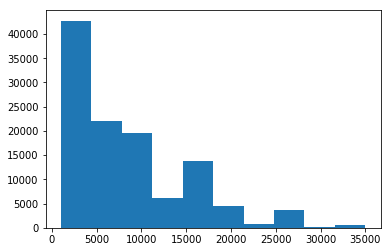

In [19]:
plt.hist(loans['LoanOriginalAmount']);

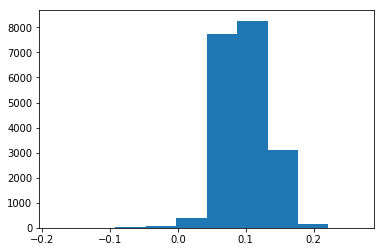

In [13]:
plt.hist(loans.dropna()["EstimatedReturn"]);

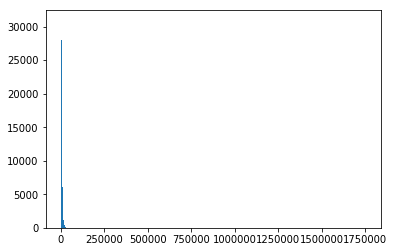

In [14]:
plt.hist(loans['StatedMonthlyIncome'], bins = 1000);